This Dataset includes soccer player ratings. The analysis is in three parts.
Data Cleaning and Analysis
Data Plotting
Machine Learning

In [1]:
#Include libraries to be used
%matplotlib inline
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import pandas as pd
#import pandas_profiling
import pydotplus
from scipy.cluster import hierarchy
import seaborn as sns
from sklearn import decomposition, preprocessing, cluster, tree
from sklearn import cluster, decomposition, pipeline, preprocessing
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
import statsmodels


Data Cleaning and Analysis

In [2]:
#Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/chrisnjunge/DStest/master/soccerratings.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/chrisnjunge/DStest/master/W3Store7.csv')


In [3]:
#df = df2[["Name","Nationality","Club","Club_Position","Rating","Height","Weight","Birth_Date","Age","Work_Rate","Weak_foot"]]

In [4]:
df.head

<bound method NDFrame.head of                     Name          Nationality National_Position  National_Kit  \
0      Cristiano Ronaldo             Portugal                LS           7.0   
1           Lionel Messi            Argentina                RW          10.0   
2                 Neymar               Brazil                LW          10.0   
3            Luis Suárez              Uruguay                LS           9.0   
4           Manuel Neuer              Germany                GK           1.0   
...                  ...                  ...               ...           ...   
17583        Adam Dunbar  Republic of Ireland               NaN           NaN   
17584       Dylan McGoey  Republic of Ireland               NaN           NaN   
17585    Tommy Ouldridge              England               NaN           NaN   
17586         Mark Foden             Scotland               NaN           NaN   
17587   Barry Richardson              England               NaN           NaN  

In [5]:
df.dtypes

Name                   object
Nationality            object
National_Position      object
National_Kit          float64
Club                   object
Club_Position          object
Club_Kit              float64
Club_Joining           object
Contract_Expiry       float64
Rating                  int64
Height                 object
Weight                 object
Preffered_Foot         object
Birth_Date             object
Age                     int64
Preffered_Position     object
Work_Rate              object
Weak_foot               int64
Skill_Moves             int64
Ball_Control            int64
Dribbling               int64
Marking                 int64
Sliding_Tackle          int64
Standing_Tackle         int64
Aggression              int64
Reactions               int64
Attacking_Position      int64
Interceptions           int64
Vision                  int64
Composure               int64
Crossing                int64
Short_Pass              int64
Long_Pass               int64
Accelerati

In [6]:
df.shape

(17588, 53)

In [7]:
def create_agebin(df):
    return pd.cut(df.Age, bins=5, labels=[str(x) for x in range(1, 6)])

cs2 = lambda df: pd.cut(df.Age, bins=5, labels=[str(x) for x in range(1, 6)])

def clean_col(col):
  return col.replace(' ', '').replace('.', '').replace('/', '')

#q6 = df.Q6.apply(limit_Nationality).rename('Nationality')

def tweak_alta(df):
  return (df
      .rename(columns=clean_col)
      .assign(Birth_Date=pd.to_datetime(df.Birth_Date),
              AGEBIN=create_agebin,
              #AGEBIN=lambda df_: pd.cut(df_.Age, bins=10, labels=[str(x) for x in range(1, 11)]),
              MONTH=lambda df_: df_.Birth_Date.dt.month,
              QTR=lambda df_: df_.Birth_Date.dt.quarter,
              YEAR=lambda df_: df_.Birth_Date.dt.year,
              DAY=lambda df_: df_.Birth_Date.dt.day_name())
      [["Rating","Age","AGEBIN","Weak_foot","MONTH","QTR"]]

  )


In [8]:
df = tweak_alta(df)

In [9]:
df.dtypes

Rating          int64
Age             int64
AGEBIN       category
Weak_foot       int64
MONTH           int64
QTR             int64
dtype: object

In [10]:
(df
 .groupby('AGEBIN')
 ['Rating']
 .describe()
)

,count,mean,std,min,25%,50%,75%,max
AGEBIN,,,,,,,,
1,6737.0,62.023601,6.777745,45.0,57.0,62.0,66.0,86.0
2,7247.0,68.393956,6.026602,46.0,65.0,68.0,72.0,93.0
3,3238.0,69.541075,5.706606,49.0,66.0,69.0,73.0,94.0
4,357.0,68.619048,5.981289,46.0,65.0,69.0,73.0,88.0
5,9.0,61.777778,9.871395,45.0,57.0,58.0,70.0,74.0


In [11]:
df.AGEBIN.value_counts()

2    7247
1    6737
3    3238
4     357
5       9
Name: AGEBIN, dtype: int64

In [12]:
df.MONTH.value_counts()

2     2124
1     1892
3     1700
4     1540
5     1494
7     1379
9     1371
6     1367
8     1335
10    1179
11    1125
12    1082
Name: MONTH, dtype: int64

In [13]:
# Categorical Data
df.MONTH.value_counts(dropna=False)

2     2124
1     1892
3     1700
4     1540
5     1494
7     1379
9     1371
6     1367
8     1335
10    1179
11    1125
12    1082
Name: MONTH, dtype: int64

<Axes: >

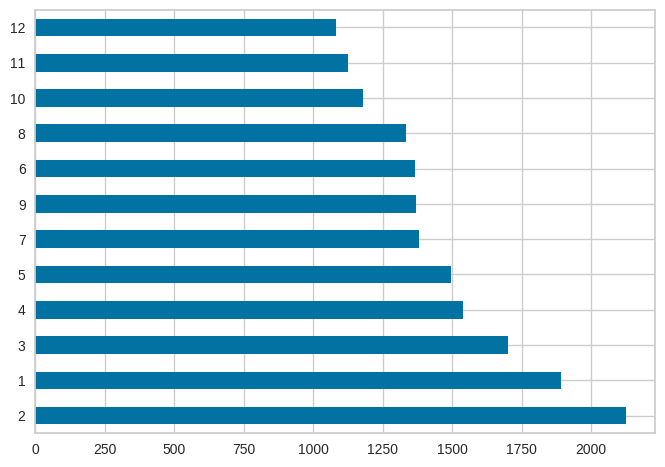

In [14]:
df.MONTH.value_counts().plot.barh()

In [15]:
# Numeric (Ordinal)
df.Age.mean()

25.460313850352513

In [16]:
df.Age.max()

47

In [17]:
df.Age.quantile(.99)

37.0

In [18]:
df.Age.quantile([.6, .8])

0.6    26.0
0.8    30.0
Name: Age, dtype: float64

In [19]:
df.Age.describe()

count    17588.000000
mean        25.460314
std          4.680217
min         17.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         47.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

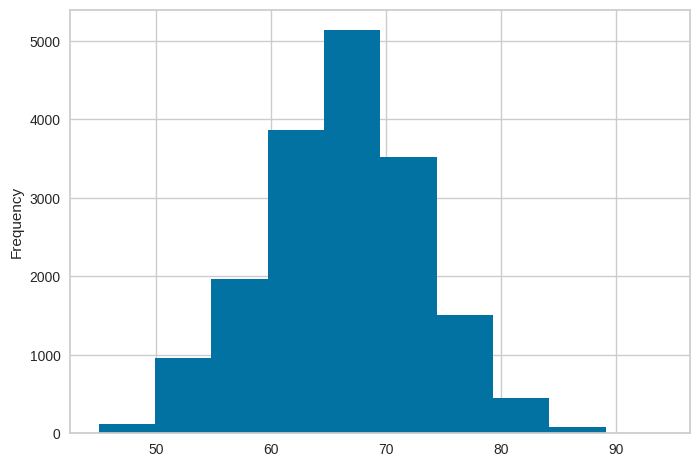

In [20]:
df.Rating.plot.hist()

<Axes: >

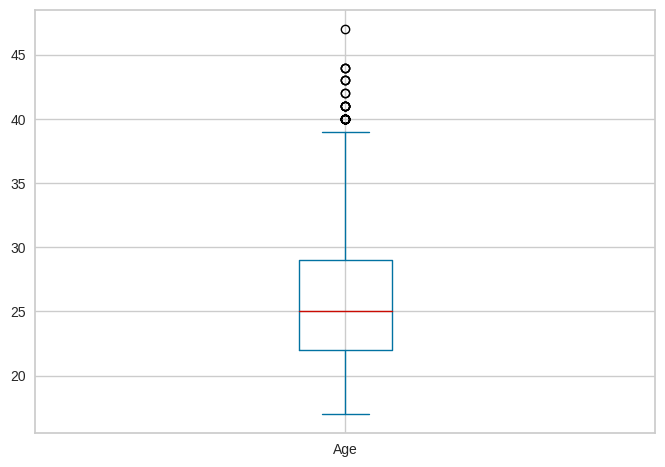

In [21]:
# Are there outliers
df.Age.plot.box()

In [22]:
# can also describe a dataframe
df.describe()

,Rating,Age,Weak_foot,MONTH,QTR
count,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000
mean,66.166193,25.460314,2.934103,5.850182,2.292302
std,7.083012,4.680217,0.655927,3.445984,1.114431
min,45.000000,17.000000,1.000000,1.000000,1.000000
25%,62.000000,22.000000,3.000000,3.000000,1.000000
50%,66.000000,25.000000,3.000000,6.000000,2.000000
75%,71.000000,29.000000,3.000000,9.000000,3.000000
max,94.000000,47.000000,5.000000,12.000000,4.000000


Data Plotting

In [23]:
# Relationships - Numeric to Numeric
df.Age.corr(df.Rating)

0.4582762737282266

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


<Axes: xlabel='Age', ylabel='Rating'>

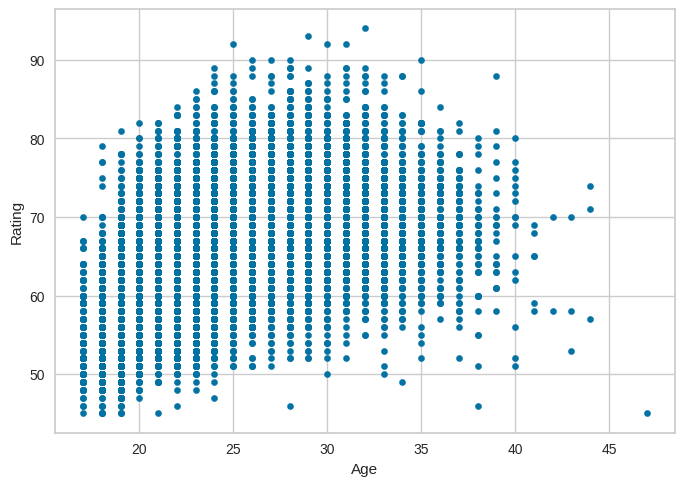

In [24]:
df.plot.scatter(x='Age', y='Rating')

<Axes: xlabel='Age', ylabel='Rating'>

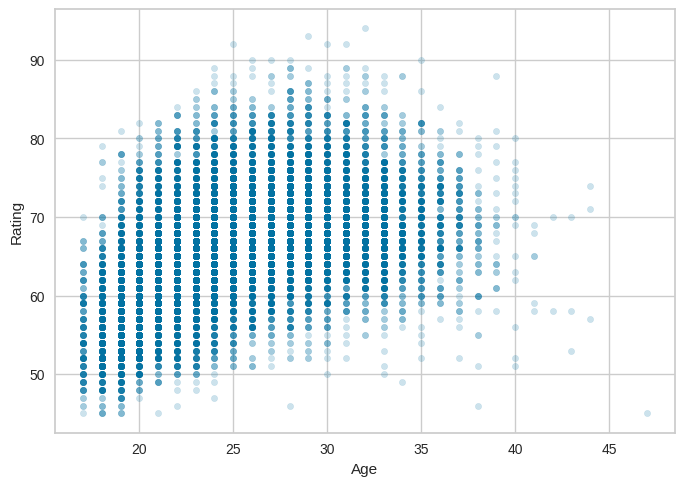

In [25]:
df.plot.scatter(x='Age', y='Rating', alpha=.2)

<Axes: xlabel='Age', ylabel='Rating'>

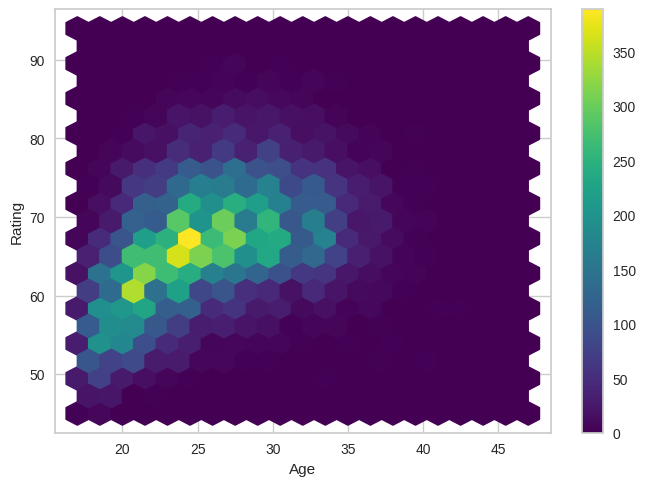

In [26]:
# Density
df.plot.hexbin(x='Age', y='Rating', gridsize=20, cmap='viridis')

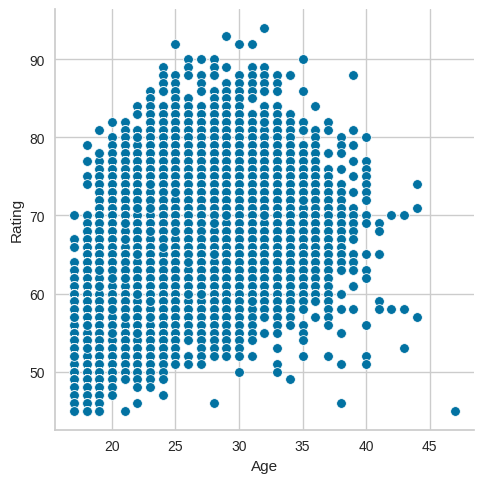

In [27]:
sns.relplot(x='Age', y='Rating', data=df)

In [28]:
df.columns

Index(['Rating', 'Age', 'AGEBIN', 'Weak_foot', 'MONTH', 'QTR'], dtype='object')

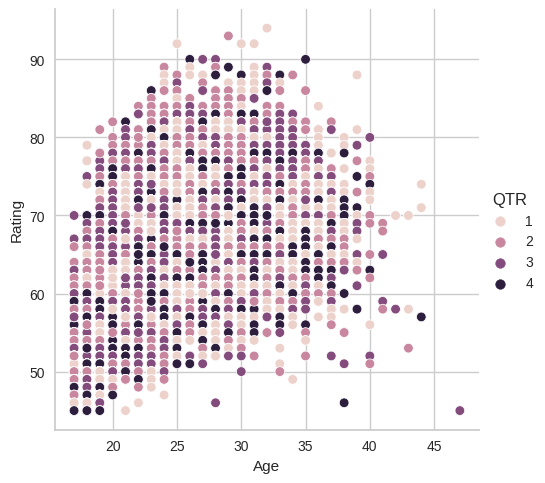

In [29]:
sns.relplot(x='Age', y='Rating', data=df, hue='QTR')

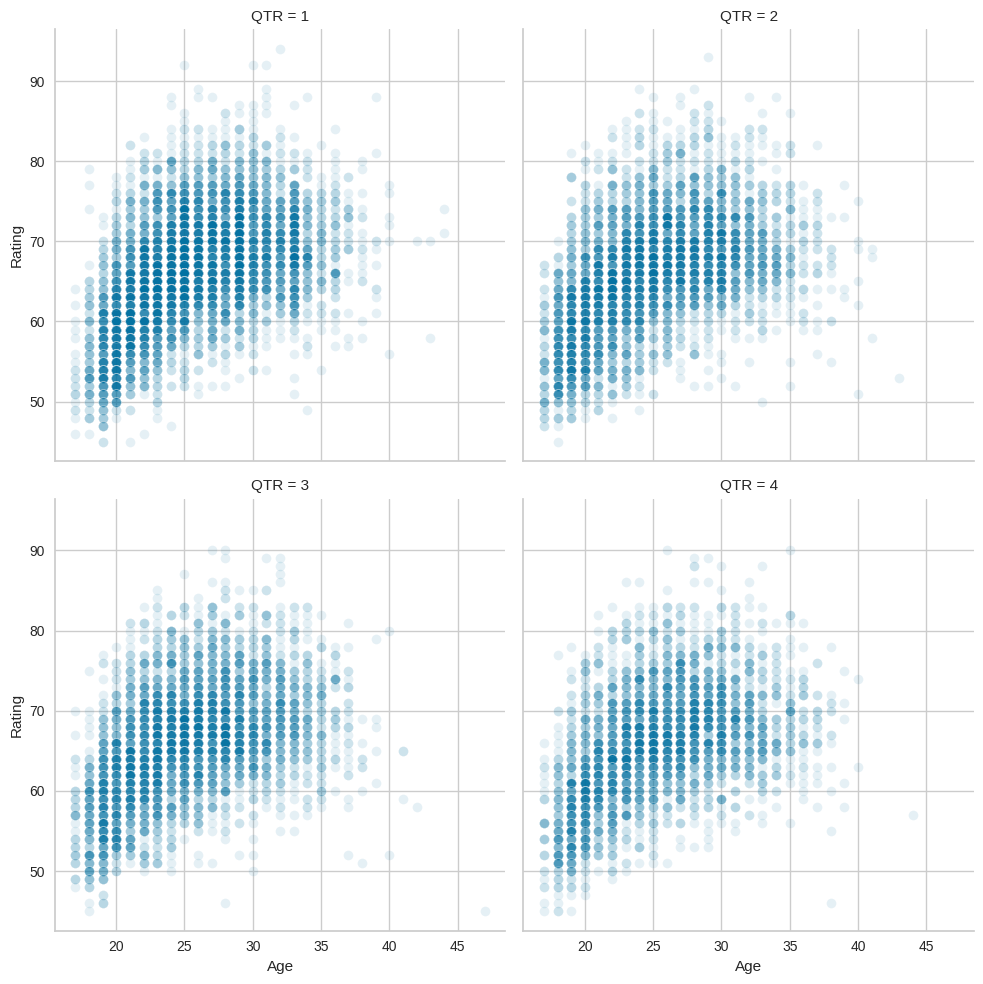

In [30]:
sns.relplot(x='Age', y='Rating', data=df, col='QTR', col_wrap=2, alpha=.1)

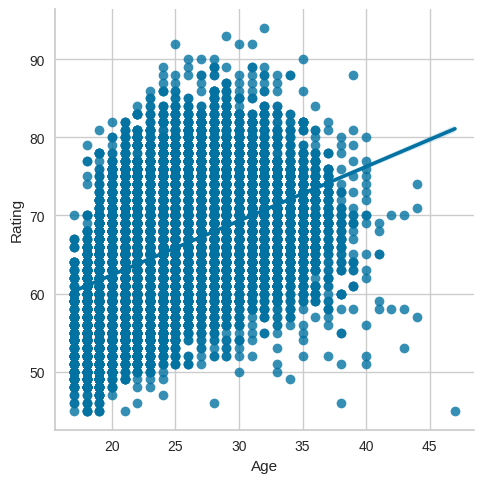

In [31]:
sns.lmplot(x='Age', y='Rating', data=df)

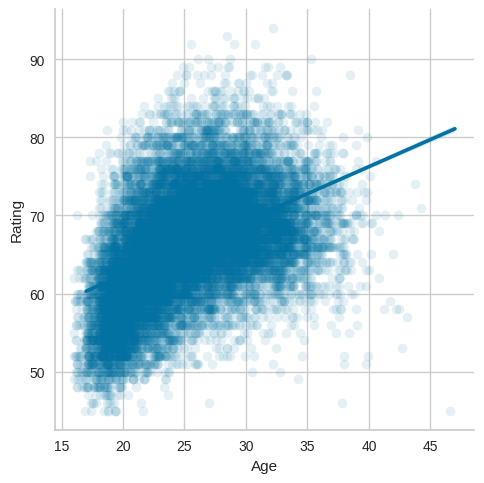

In [32]:
# lower alpha value
sns.lmplot(x='Age', y='Rating', data=df, x_jitter=1, scatter_kws={'alpha':.1})

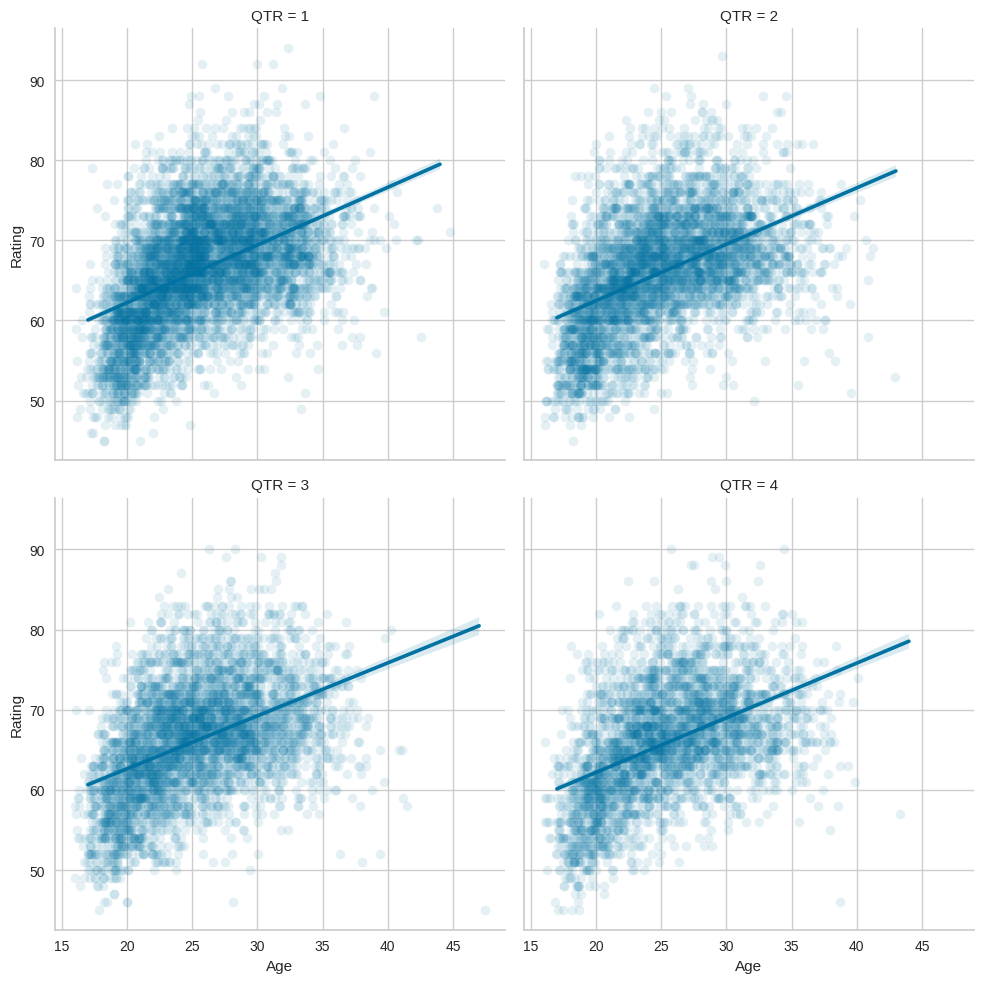

In [33]:
sns.lmplot(x='Age', y='Rating', data=df, x_jitter=1, scatter_kws={'alpha':.1},
          col='QTR', col_wrap=2)

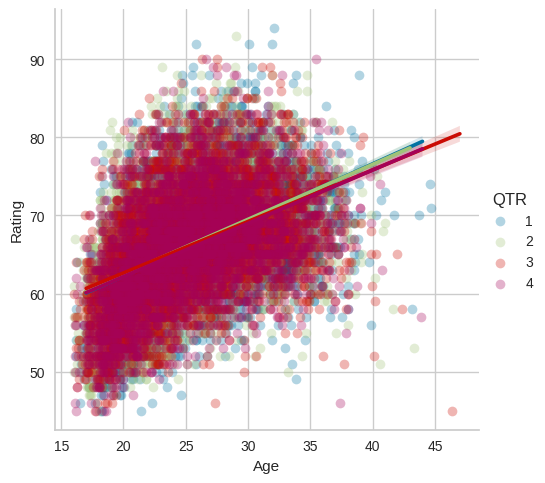

In [34]:
sns.lmplot(x='Age', y='Rating', data=df, x_jitter=1, scatter_kws={'alpha':.3},
           hue='QTR')

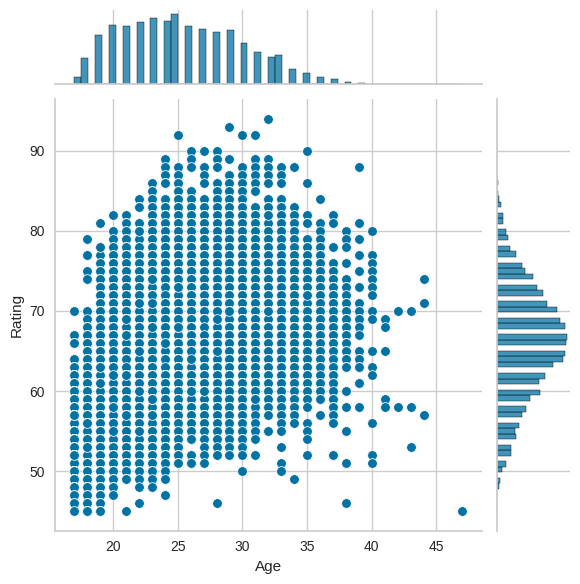

In [35]:
# combine frequency and scatter plot
sns.jointplot(x='Age', y='Rating', data=df)

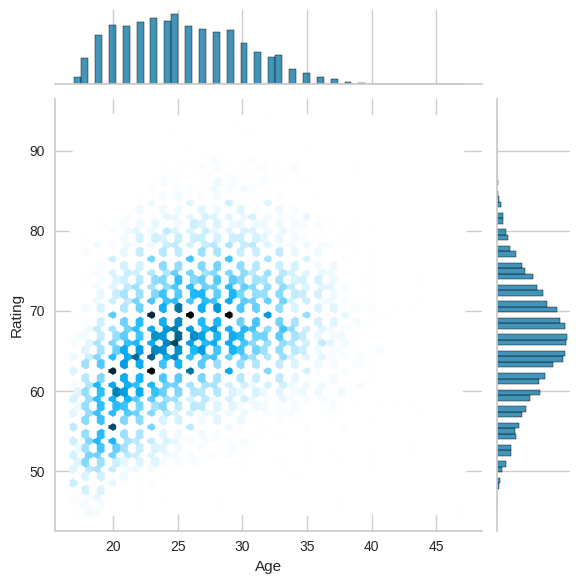

In [36]:
# combine frequency and scatter plot
sns.jointplot(x='Age', y='Rating', data=df, kind='hex')

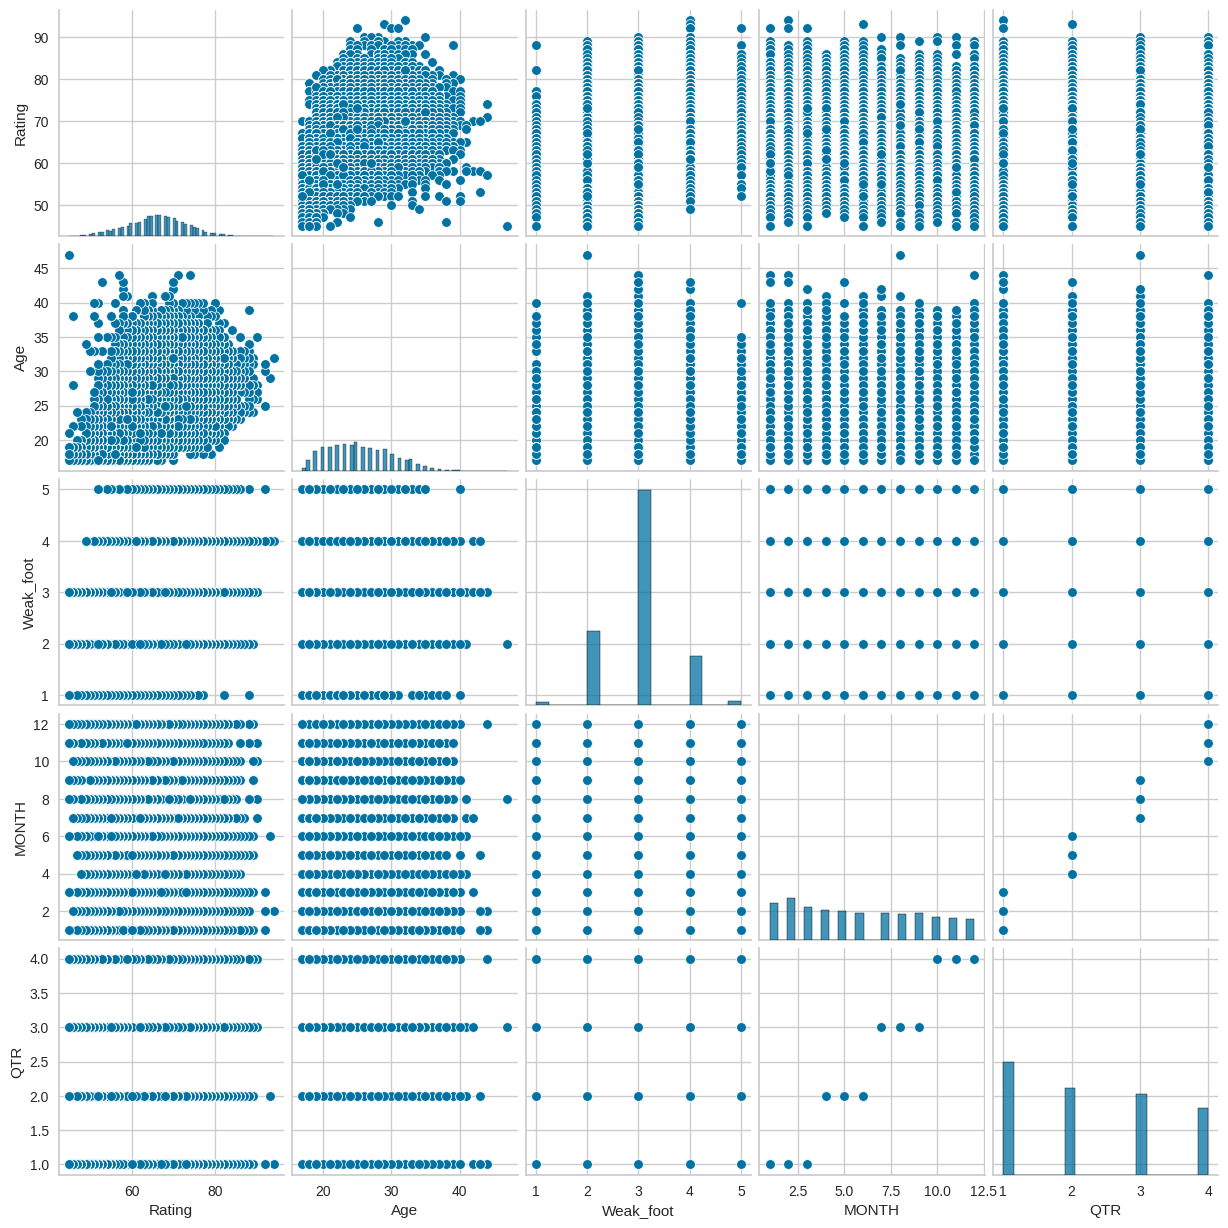

In [37]:
sns.pairplot(df)

<ipython-input-38-12b0ee42fe6e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)


<Axes: >

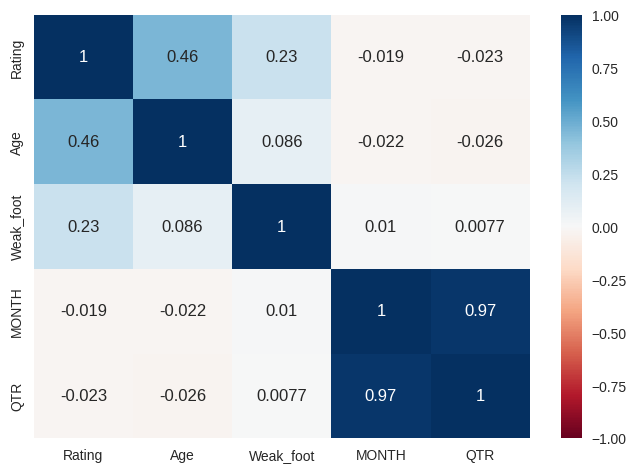

In [38]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

In [39]:
# 2D Categorical vs Continuous
pd.pivot_table(df, values='Rating', index='AGEBIN', aggfunc='mean')

,Rating
AGEBIN,
1,62.023601
2,68.393956
3,69.541075
4,68.619048
5,61.777778


In [40]:
# can also do this with a groupby
(df
 .groupby('AGEBIN')
 [['Rating']]
 .mean()
)

,Rating
AGEBIN,
1,62.023601
2,68.393956
3,69.541075
4,68.619048
5,61.777778


In [41]:
# can also do this with a groupby
(df
 .groupby('AGEBIN')
 ['Rating']
 .describe()
)

,count,mean,std,min,25%,50%,75%,max
AGEBIN,,,,,,,,
1,6737.0,62.023601,6.777745,45.0,57.0,62.0,66.0,86.0
2,7247.0,68.393956,6.026602,46.0,65.0,68.0,72.0,93.0
3,3238.0,69.541075,5.706606,49.0,66.0,69.0,73.0,94.0
4,357.0,68.619048,5.981289,46.0,65.0,69.0,73.0,88.0
5,9.0,61.777778,9.871395,45.0,57.0,58.0,70.0,74.0


In [42]:
# 2D Categorical vs Continuous
def custom(ser):
    return ser.quantile(.99)

pd.pivot_table(df, values='Rating', index='AGEBIN',
               aggfunc=['min', 'mean', 'max', custom])

,min,mean,max,custom
,Rating,Rating,Rating,Rating
AGEBIN,,,,
1,45,62.023601,86,79.00
2,46,68.393956,93,84.00
3,49,69.541075,94,84.00
4,46,68.619048,88,81.00
5,45,61.777778,74,73.76


<Axes: xlabel='AGEBIN', ylabel='Rating'>

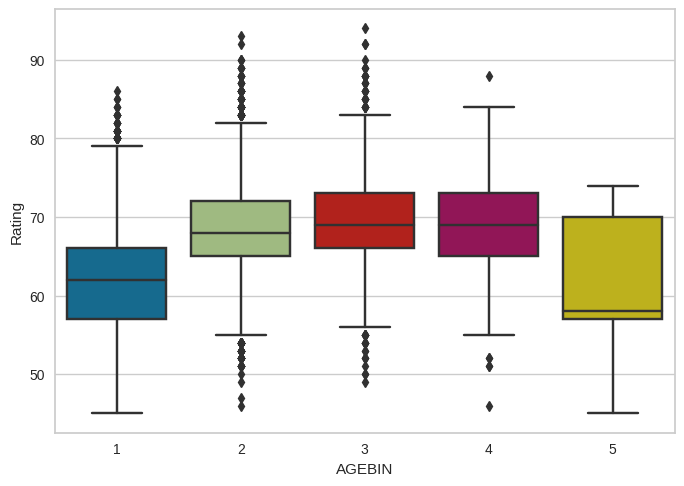

In [43]:
# 2D Categorical vs Continuous Visualization
sns.boxplot(x='AGEBIN', y='Rating', data=df)

<Axes: xlabel='Age', ylabel='Rating'>

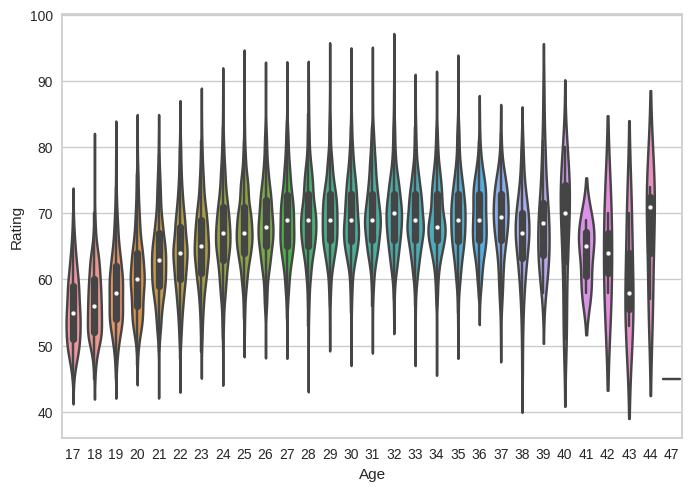

In [44]:
# 2D Categorical vs Continuous
sns.violinplot(x='Age', y='Rating', data=df)

<Axes: xlabel='Age', ylabel='Rating'>

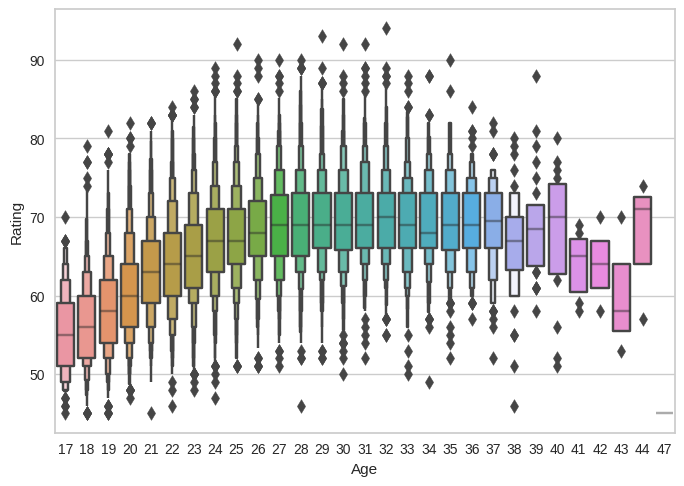

In [45]:
# 2D Categorical vs Continuous
sns.boxenplot(x='Age', y='Rating', data=df)

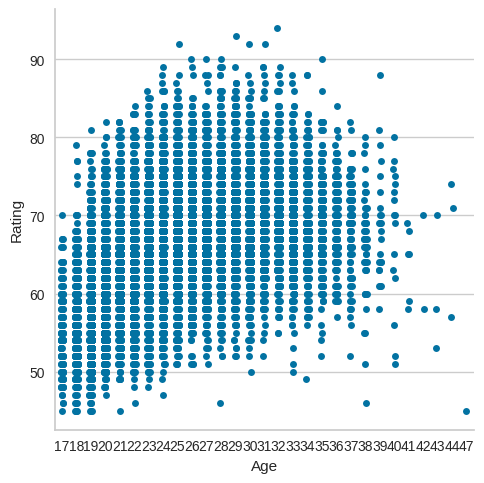

In [46]:
ax = sns.catplot(x='Age', y='Rating', data=df)

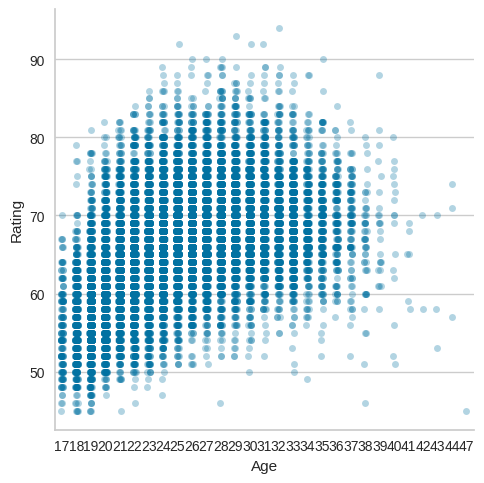

In [47]:
ax = sns.catplot(x='Age', y='Rating', data=df, alpha=.3)

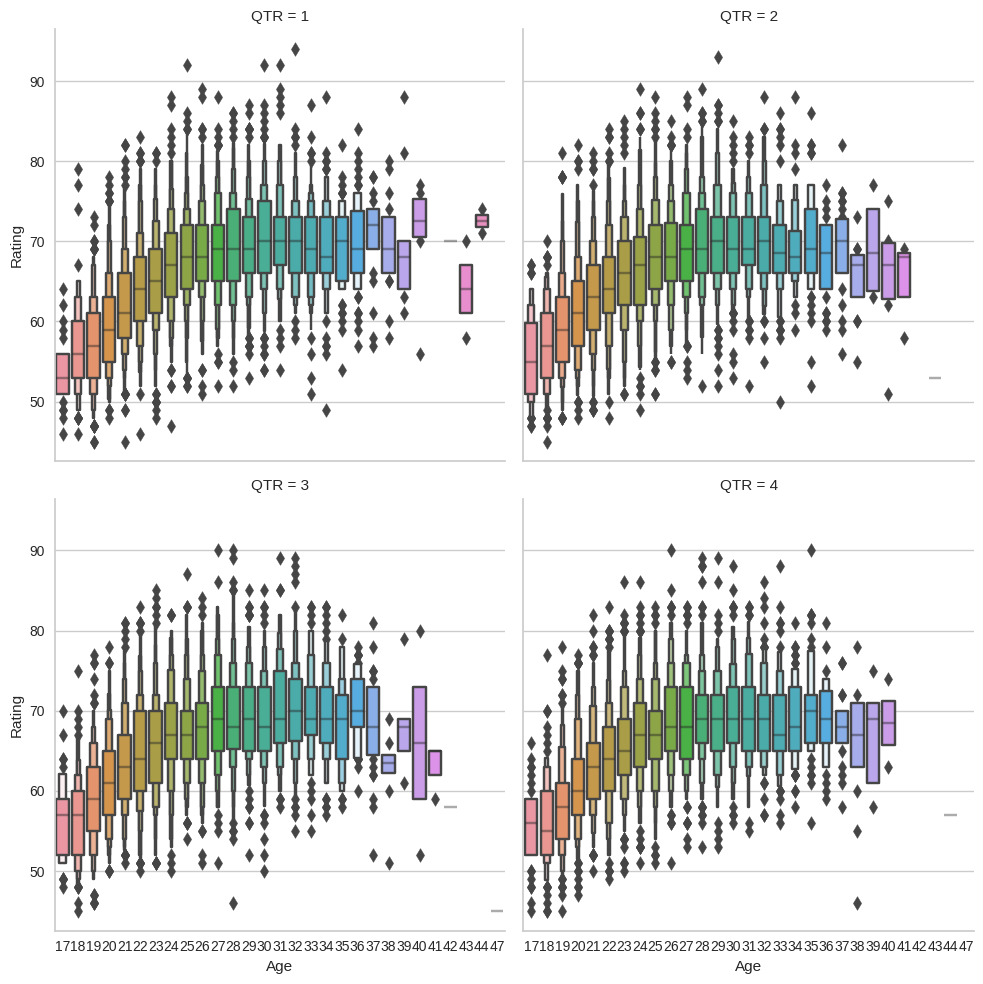

In [48]:
# Can add more dimensions with col, row
ax = sns.catplot(x='Age', y='Rating', data=df, kind='boxen', col='QTR', col_wrap=2)

In [49]:
# 2D Cat vs Cat

In [50]:
(df
 .pipe(lambda df: pd.crosstab(df.AGEBIN, df.Age))
)

Age,17,18,19,20,21,22,23,24,25,26,...,36,37,38,39,40,41,42,43,44,47
AGEBIN,,,,,,,,,,,,,,,,,,,,,
1,157,533,1004,1208,1196,1283,1356,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1296,1447,1195,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,159,102,50,24,16,6,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,3,3,1


In [51]:
# percent of occupation by country
(df
 .pipe(lambda df2: pd.crosstab(df2.Weak_foot, df2.Age))
 .pipe(lambda df2: df2.div(df2.sum(axis=1), axis=0))
 .mul(100)
)

Age,17,18,19,20,21,22,23,24,25,26,...,36,37,38,39,40,41,42,43,44,47
Weak_foot,,,,,,,,,,,,,,,,,,,,,
1,2.054795,4.794521,10.273973,5.479452,4.794521,2.054795,6.164384,6.164384,8.904110,6.164384,...,2.054795,0.684932,1.369863,0.000000,0.684932,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.876261,3.531599,6.850770,8.258099,7.673925,8.178439,8.098779,6.956984,7.939458,6.558683,...,0.876261,0.531067,0.371747,0.185874,0.106213,0.106213,0.000000,0.000000,0.000000,0.026553
3,0.975032,3.280481,5.941316,7.153271,6.925460,7.362858,7.654456,7.426645,8.201203,6.478950,...,0.883907,0.528522,0.255149,0.127574,0.072900,0.018225,0.009112,0.018225,0.027337,0.000000
4,0.518962,1.237525,2.914172,3.992016,4.990020,5.868263,7.345309,7.864271,8.782435,8.463074,...,1.037924,0.918164,0.239521,0.119760,0.079840,0.000000,0.039920,0.039920,0.000000,0.000000
5,0.507614,1.015228,3.045685,2.030457,7.614213,8.629442,9.137056,6.598985,7.614213,8.121827,...,0.000000,0.000000,0.000000,0.000000,0.507614,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
# percent of country by occupation
(df
 .pipe(lambda df2: pd.crosstab(df2.Weak_foot, df2.Age))
 .pipe(lambda df2: df2.div(df2.sum(axis=0), axis=1))
 .mul(100)
)

Age,17,18,19,20,21,22,23,24,25,26,...,36,37,38,39,40,41,42,43,44,47
Weak_foot,,,,,,,,,,,,,,,,,,,,,
1,1.910828,1.313321,1.494024,0.662252,0.585284,0.233827,0.663717,0.694444,0.898411,0.753138,...,1.886792,0.980392,4.0,0.000000,6.25,0.000000,0.0,0.000000,0.0,0.0
2,21.019108,24.953096,25.697211,25.745033,24.163880,24.006235,22.492625,20.216049,20.663442,20.669456,...,20.754717,19.607843,28.0,29.166667,25.00,66.666667,0.0,0.000000,0.0,100.0
3,68.152866,67.542214,64.940239,64.983444,63.545151,62.977397,61.946903,62.885802,62.197650,59.497908,...,61.006289,56.862745,56.0,58.333333,50.00,33.333333,50.0,66.666667,100.0,0.0
4,8.280255,5.816135,7.270916,8.278146,10.451505,11.457521,13.569322,15.200617,15.203870,17.740586,...,16.352201,22.549020,12.0,12.500000,12.50,0.000000,50.0,33.333333,0.0,0.0
5,0.636943,0.375235,0.597610,0.331126,1.254181,1.325019,1.327434,1.003086,1.036628,1.338912,...,0.000000,0.000000,0.0,0.000000,6.25,0.000000,0.0,0.000000,0.0,0.0


In [53]:
# add margin
(df
 .pipe(lambda df2: pd.crosstab(df2.Weak_foot, df2.Age, margins=True))
)

Age,17,18,19,20,21,22,23,24,25,26,...,37,38,39,40,41,42,43,44,47,All
Weak_foot,,,,,,,,,,,,,,,,,,,,,
1,3,7,15,8,7,3,9,9,13,9,...,1,2,0,1,0,0,0,0,0,146
2,33,133,258,311,289,308,305,262,299,247,...,20,14,7,4,4,0,0,0,1,3766
3,107,360,652,785,760,808,840,815,900,711,...,58,28,14,8,2,1,2,3,0,10974
4,13,31,73,100,125,147,184,197,220,212,...,23,6,3,2,0,1,1,0,0,2505
5,1,2,6,4,15,17,18,13,15,16,...,0,0,0,1,0,0,0,0,0,197
All,157,533,1004,1208,1196,1283,1356,1296,1447,1195,...,102,50,24,16,6,2,3,3,1,17588


<Axes: xlabel='Age'>

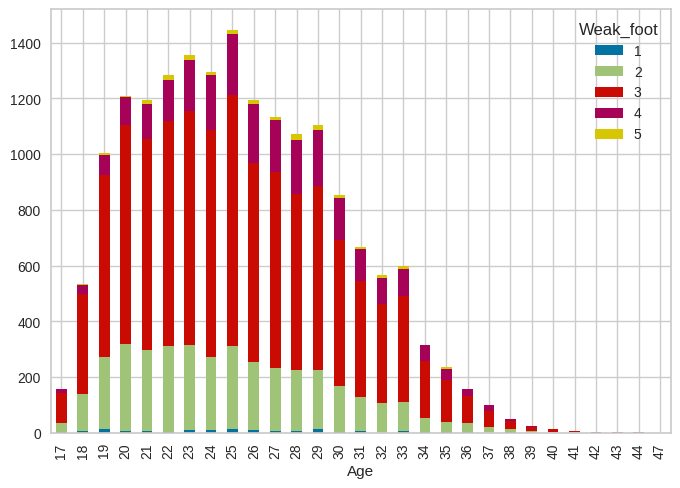

In [54]:
(df
 .pipe(lambda df2: pd.crosstab(df2.Age, df2.Weak_foot))
 .plot.bar(stacked=True)
)

<Axes: xlabel='Age'>

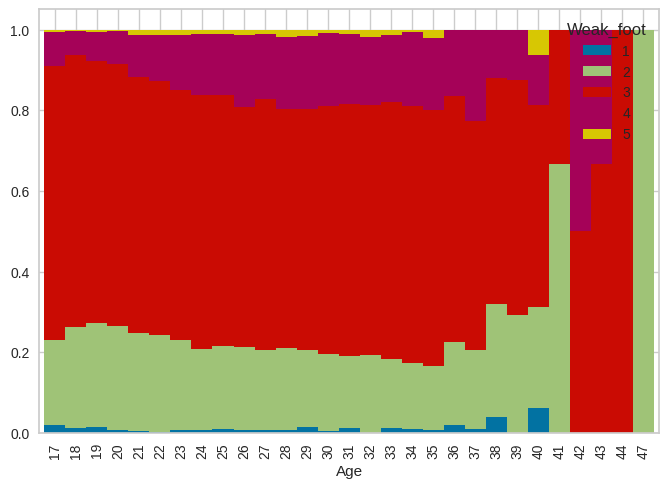

In [55]:
# Normalize
(df
 .pipe(lambda df2: pd.crosstab(df2.Age, df2.Weak_foot))
 .pipe(lambda df2: df2.div(df2.sum(axis=1), axis=0))
 .plot.bar(width=1, stacked=True)
)

In [56]:
# need to create numbers for categories, hence .get_dummies call
def tweak_kag2(df):
    df = pd.get_dummies(df, drop_first=True)
    cols = [c.replace(' ', '_') for c in df.columns]
    df.columns = cols
    return df
df = tweak_kag2(df)
df

,Rating,Age,Weak_foot,MONTH,QTR,AGEBIN_2,AGEBIN_3,AGEBIN_4,AGEBIN_5
0,94,32,4,2,1,0,1,0,0
1,93,29,4,6,2,1,0,0,0
2,92,25,5,2,1,1,0,0,0
3,92,30,4,1,1,0,1,0,0
4,92,31,4,3,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
17583,45,19,1,1,1,0,0,0,0
17584,45,19,2,11,4,0,0,0,0
17585,45,18,2,11,4,0,0,0,0
17586,45,21,3,3,1,0,0,0,0


Machine Learning

In [57]:
df.dtypes

Rating       int64
Age          int64
Weak_foot    int64
MONTH        int64
QTR          int64
AGEBIN_2     uint8
AGEBIN_3     uint8
AGEBIN_4     uint8
AGEBIN_5     uint8
dtype: object

In [58]:
X = df
std = preprocessing.StandardScaler()
X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)
X_std

,Rating,Age,Weak_foot,MONTH,QTR,AGEBIN_2,AGEBIN_3,AGEBIN_4,AGEBIN_5
0,3.929769,1.397344,1.625071,-1.117327,-1.159640,-0.837140,2.105172,-0.143939,-0.022627
1,3.788582,0.756330,1.625071,0.043477,-0.262295,1.194544,-0.475021,-0.143939,-0.022627
2,3.647395,-0.098356,3.149676,-1.117327,-1.159640,1.194544,-0.475021,-0.143939,-0.022627
3,3.647395,0.970001,1.625071,-1.407528,-1.159640,-0.837140,2.105172,-0.143939,-0.022627
4,3.647395,1.183672,1.625071,-0.827126,-1.159640,-0.837140,2.105172,-0.143939,-0.022627
...,...,...,...,...,...,...,...,...,...
17583,-2.988389,-1.380384,-2.948741,-1.407528,-1.159640,-0.837140,-0.475021,-0.143939,-0.022627
17584,-2.988389,-1.380384,-1.424137,1.494483,1.532394,-0.837140,-0.475021,-0.143939,-0.022627
17585,-2.988389,-1.594055,-1.424137,1.494483,1.532394,-0.837140,-0.475021,-0.143939,-0.022627
17586,-2.988389,-0.953041,0.100467,-0.827126,-1.159640,-0.837140,-0.475021,-0.143939,-0.022627


In [59]:
X_std.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of          Rating       Age  Weak_foot     MONTH       QTR  AGEBIN_2  AGEBIN_3  \
0      3.929769  1.397344   1.625071 -1.117327 -1.159640 -0.837140  2.105172   
1      3.788582  0.756330   1.625071  0.043477 -0.262295  1.194544 -0.475021   
2      3.647395 -0.098356   3.149676 -1.117327 -1.159640  1.194544 -0.475021   
3      3.647395  0.970001   1.625071 -1.407528 -1.159640 -0.837140  2.105172   
4      3.647395  1.183672   1.625071 -0.827126 -1.159640 -0.837140  2.105172   
...         ...       ...        ...       ...       ...       ...       ...   
17583 -2.988389 -1.380384  -2.948741 -1.407528 -1.159640 -0.837140 -0.475021   
17584 -2.988389 -1.380384  -1.424137  1.494483  1.532394 -0.837140 -0.475021   
17585 -2.988389 -1.594055  -1.424137  1.494483  1.532394 -0.837140 -0.475021   
17586 -2.988389 -0.953041   0.100467 -0.827126 -1.159640 -0.837140 -0.475021   
17587 -2.988389  4.602414  -1.424137  0.623880  0.635049 

<Axes: >

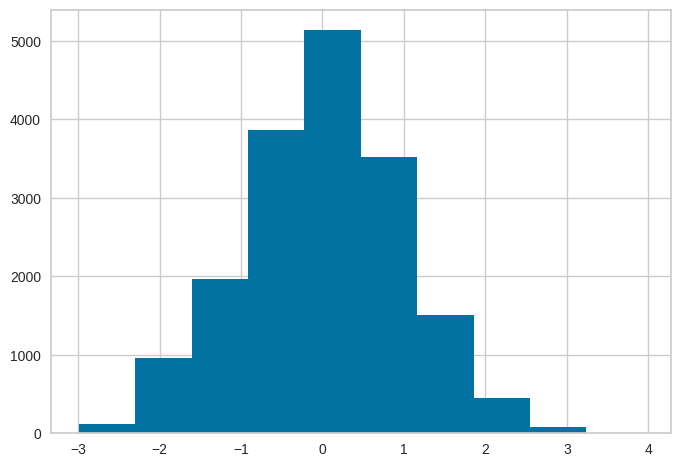

In [60]:
X_std.Rating.hist()

In [61]:
pca = decomposition.PCA()
pca_X = pd.DataFrame(pca.fit_transform(X_std), columns=[f'PC{i+1}' for i in range(len(X.columns))])
pca_X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,4.294053,1.055073,0.433798,-1.747019,-0.113176,0.763034,2.090798,0.155611,-0.021545
1,2.022131,1.101835,3.080362,-0.772947,-0.050523,0.646472,1.846764,-0.219321,-0.206154
2,2.564584,-0.255902,3.357565,-1.451067,-0.015131,2.134586,1.681787,0.306029,-0.021243
3,4.071042,0.658347,0.304529,-1.787489,-0.111988,0.863869,2.027067,0.411608,0.181765
4,3.950882,1.072811,0.325190,-1.747836,-0.102804,0.814272,1.950570,0.277087,-0.227885
...,...,...,...,...,...,...,...,...,...
17583,-1.545057,-3.244908,-2.491733,1.132951,-0.054868,-1.698605,-0.684184,0.111048,0.164098
17584,-3.593956,0.169795,-1.927096,0.604630,0.058761,-0.525426,-1.039215,0.095154,0.017639
17585,-3.708669,0.091261,-1.930930,0.566773,0.054380,-0.486832,-0.961769,0.226964,0.016906
17586,-1.107164,-2.388230,-1.652806,0.130055,0.088025,0.781288,-1.563699,-0.160685,-0.241164


In [62]:
pca.explained_variance_ratio_

array([0.22538824, 0.21634318, 0.15623977, 0.12052192, 0.11142899,
       0.10363236, 0.05796982, 0.00537591, 0.00309981])

In [63]:
# Components
# First component is .49 * Age + .21 * Edu + .09 * Exp ... etc
pca.components_[0]

array([ 0.39317291,  0.53686691,  0.14539504, -0.4046729 , -0.40720267,
        0.02121854,  0.41866438,  0.17012553,  0.04245365])

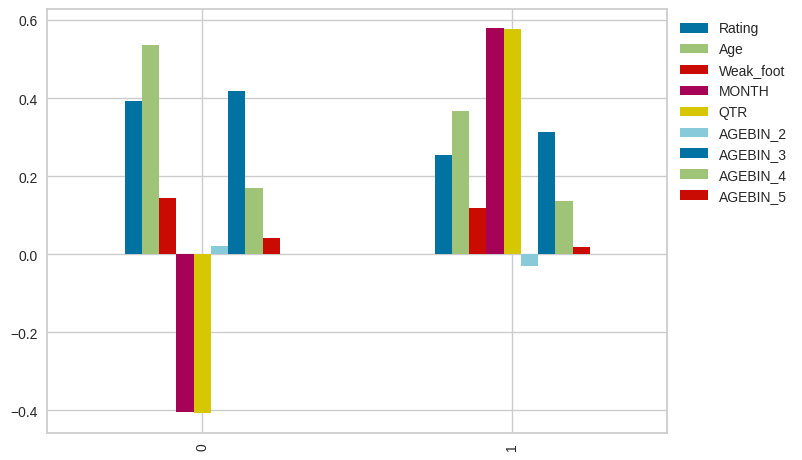

In [64]:
(pd.DataFrame(pca.components_, columns=X.columns)
 .iloc[:2]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1)))

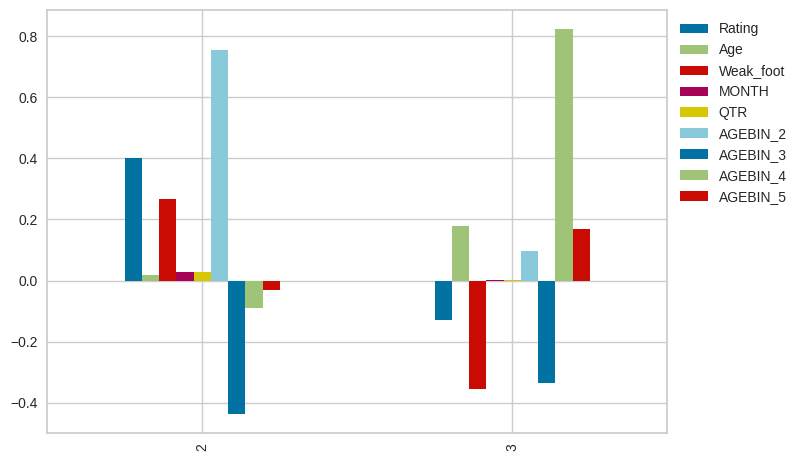

In [65]:
(pd.DataFrame(pca.components_, columns=X.columns)
 .iloc[2:4]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1)))

<Axes: xlabel='PC1', ylabel='PC2'>

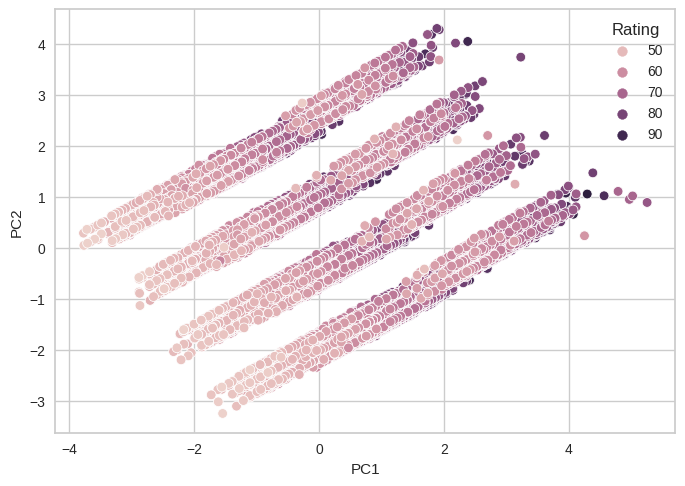

In [66]:
sns.scatterplot(x='PC1', y='PC2',
                data=pca_X.assign(Rating=X.Rating),
                hue='Rating')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

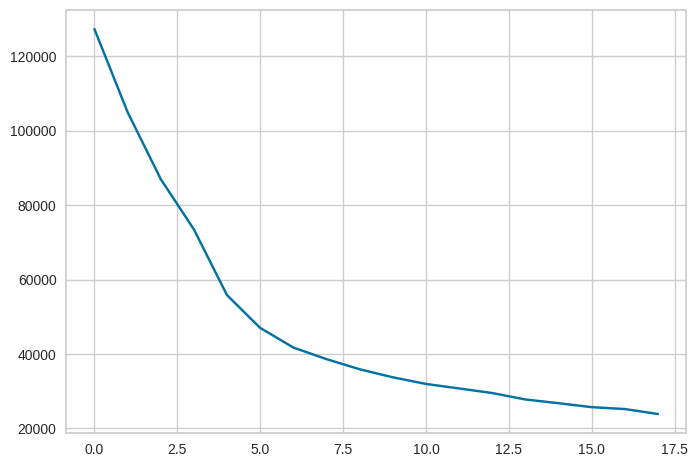

In [67]:
inerts = []
for i in range(2, 20):
    k = cluster.KMeans(n_clusters=i, random_state=42)
    k.fit(X_std)
    inerts.append(k.inertia_)

pd.Series(inerts).plot()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

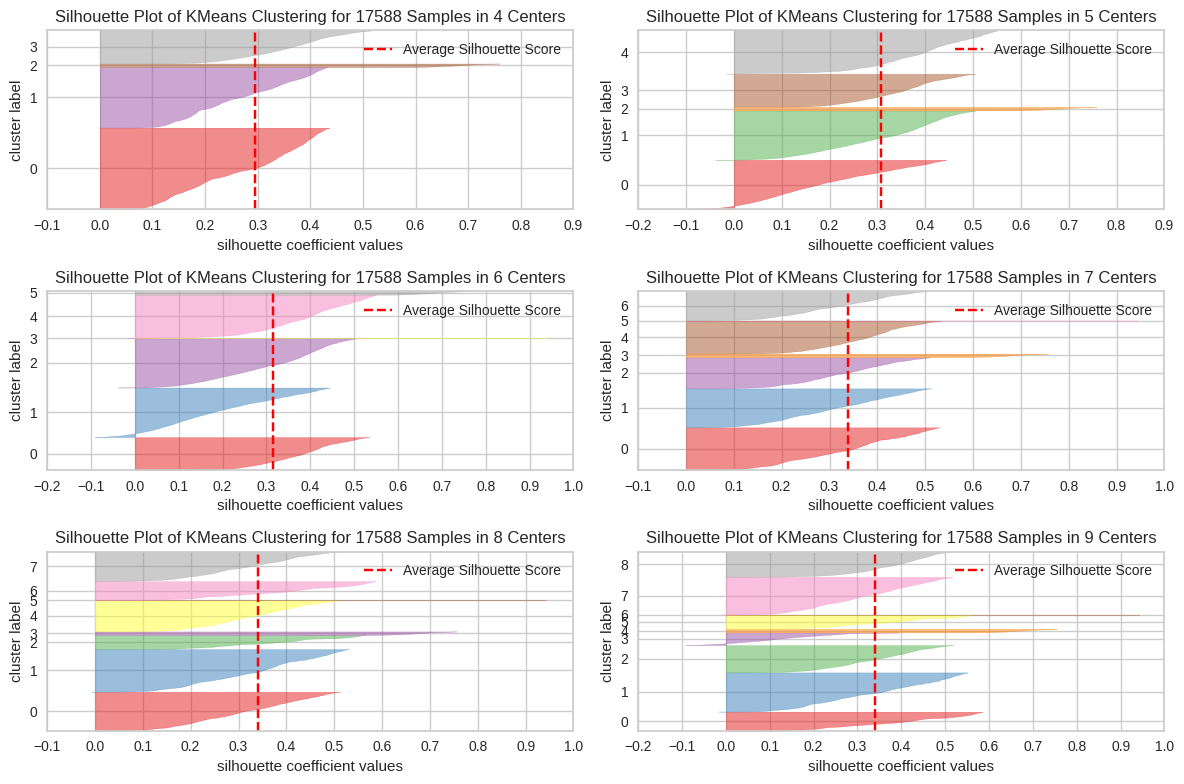

In [68]:
start, end = 4, 10
cols = 2
rows = ((end - start) // cols)
fix, axes = plt.subplots(rows, cols, figsize=(12,8))
axes = axes.reshape(cols * rows)
for i, k in enumerate(range(start, end), 0):
    ax = axes[i]
    sil = SilhouetteVisualizer(cluster.KMeans(n_clusters=k, random_state=42), ax=ax)
    sil.fit(X_std)
    sil.finalize()
plt.tight_layout()

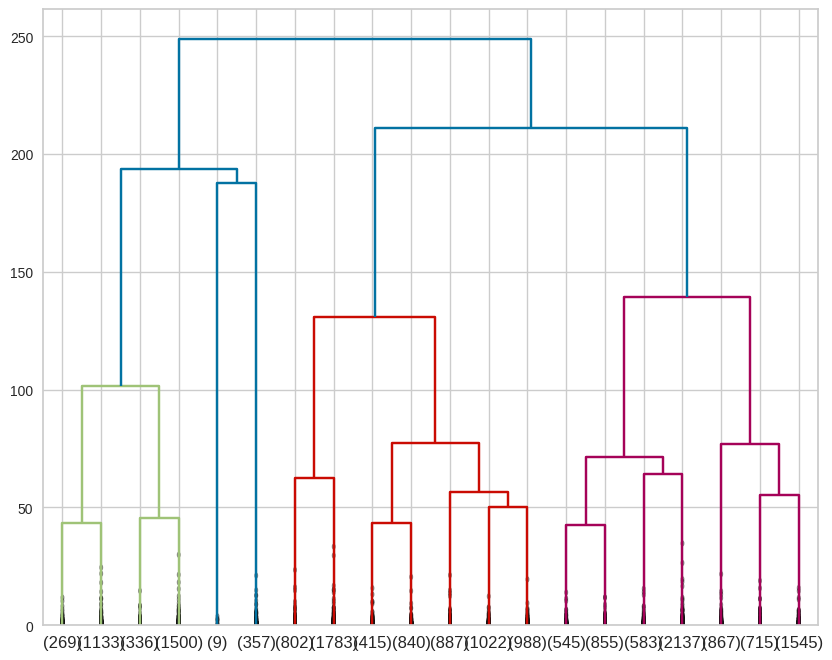

In [69]:
fig, ax = plt.subplots(figsize=(10,8))
hierarchy.dendrogram(hierarchy.linkage(X_std, method='ward'), labels=X_std.index,
                    truncate_mode='lastp', p=20, show_contracted=True)
pass  # here to hide return value of above

In [70]:
# going to choose 9 clusters
k9 = cluster.KMeans(n_clusters=9, random_state=42)
k9.fit(X_std)
labels = k9.predict(X_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [71]:
labels

array([0, 3, 3, ..., 2, 7, 6], dtype=int32)

In [72]:
X.assign(label=labels)


,Rating,Age,Weak_foot,MONTH,QTR,AGEBIN_2,AGEBIN_3,AGEBIN_4,AGEBIN_5,label
0,94,32,4,2,1,0,1,0,0,0
1,93,29,4,6,2,1,0,0,0,3
2,92,25,5,2,1,1,0,0,0,3
3,92,30,4,1,1,0,1,0,0,0
4,92,31,4,3,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
17583,45,19,1,1,1,0,0,0,0,7
17584,45,19,2,11,4,0,0,0,0,2
17585,45,18,2,11,4,0,0,0,0,2
17586,45,21,3,3,1,0,0,0,0,7


In [73]:
(X.assign(label=labels)
  .groupby('label')
  .agg(['mean', 'var'])
  .T
)

label                   0          1          2          3          4  \
Rating    mean  69.654196  68.242119  61.360997  71.622672  68.619048   
          var   31.352548  34.512312  40.270973  34.872095  35.775816   
Age       mean  31.865313  26.336951  20.675847  25.204049  37.030812   
          var    2.394684   2.998350   2.909405   6.846499   1.529947   
Weak_foot mean   2.993052   2.861757   2.781913   4.102024   2.904762   
          var    0.419738   0.340408   0.285257   0.125725   0.479668   
MONTH     mean   3.169428   3.079328   9.336435   7.466397   5.994398   
          var    2.816733   2.693886   2.892726   7.467873  12.595474   
QTR       mean   1.407803   1.366925   3.453666   2.832389   2.310924   
          var    0.241629   0.232351   0.247945   0.747410   1.332830   
AGEBIN_2  mean   0.000000   0.999483   0.000000   0.734413   0.000000   
          var    0.000000   0.000517   0.000000   0.195209   0.000000   
AGEBIN_3  mean   1.000000   0.000000   0.000000   0.000000   0.000000   
          var    0.000000   0.000000   0.000000   0.000000   0.000000   
AGEBIN_4  mean   0.000000   0.000000   0.000000   0.000000   1.000000   
          var    0.000000   0.000000   0.000000   0.000000   0.000000   
AGEBIN_5  mean   0.000000   0.000000   0.000000   0.000000   0.000000   
          var    0.000000   0.000000   0.000000   0.000000   0.000000   

label                   5          6          7          8  
Rating    mean  69.386247  61.777778  61.588820  67.545123  
          var   34.207951  97.444444  41.773896  34.782477  
Age       mean  31.868325  43.555556  20.778017  26.336706  
          var    2.584406   2.277778   2.750173   2.792656  
Weak_foot mean   3.018288   3.111111   2.806504   2.733711  
          var    0.455741   0.361111   0.339968   0.218130  
MONTH     mean   9.407462   4.555556   3.367374   9.375556  
          var    2.837514  14.277778   2.906666   2.781167  
QTR       mean   3.460863   1.888889   1.472185   3.465803  
          var    0.248650   1.361111   0.249293   0.248931  
AGEBIN_2  mean   0.000000   0.000000   0.000537   0.999595  
          var    0.000000   0.000000   0.000537   0.000405  
AGEBIN_3  mean   1.000000   0.000000   0.000000   0.000000  
          var    0.000000   0.000000   0.000000   0.000000  
AGEBIN_4  mean   0.000000   0.000000   0.000000   0.000000  
          var    0.000000   0.000000   0.000000   0.000000  
AGEBIN_5  mean   0.000000   1.000000   0.000000   0.000000  
          var    0.000000   0.000000   0.000000   0.000000

In [74]:
pd.Series(labels).value_counts().sort_index()

0    1871
1    3870
2    2687
3    1235
4     357
5    1367
6       9
7    3721
8    2471
dtype: int64

In [75]:
(X.assign(label=labels)
  .groupby('label')
  .mean()
  .T
 .style.background_gradient(cmap='RdBu', axis=1)
)

label,0,1,2,3,4,5,6,7,8
Rating,69.654196,68.242119,61.360997,71.622672,68.619048,69.386247,61.777778,61.588820,67.545123
Age,31.865313,26.336951,20.675847,25.204049,37.030812,31.868325,43.555556,20.778017,26.336706
Weak_foot,2.993052,2.861757,2.781913,4.102024,2.904762,3.018288,3.111111,2.806504,2.733711
MONTH,3.169428,3.079328,9.336435,7.466397,5.994398,9.407462,4.555556,3.367374,9.375556
QTR,1.407803,1.366925,3.453666,2.832389,2.310924,3.460863,1.888889,1.472185,3.465803
AGEBIN_2,0.000000,0.999483,0.000000,0.734413,0.000000,0.000000,0.000000,0.000537,0.999595
AGEBIN_3,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
AGEBIN_4,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
AGEBIN_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
